In [2]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ruta =  '../imgpack/Monobanda/2_Corsica.jpg'
img = cv.imread(ruta,cv.IMREAD_GRAYSCALE) #Transformamos nuestra imagen a escala de grises

In [9]:
def ecual(img):
    def histograma(img):
        resimg = img.copy()
        f,c = resimg.shape
        hst = [0]*256
        for x in range(f):
            for y in range(c):
                pixel=resimg[x,y]
                hst[pixel]+=1
        return hst
    
    resimg = img.copy()
    
    # 1. Calcular frecuencia absoluta
    hst = histograma(resimg)
    
    # 2. Frecuencia acumulada
    fr_acum = np.cumsum(hst)
    
    # 3. Factor de Escala
    f_escala = 255 / resimg.size
    
    nd_pr = np.rint(f_escala*fr_acum) # ND'
    #print(nd_pr)
    
    filas,columnas = resimg.shape
    for i in range(filas):
        for j in range(columnas):
            p = resimg[i,j]
            resimg[i,j] = nd_pr[p]
            
    
    return resimg

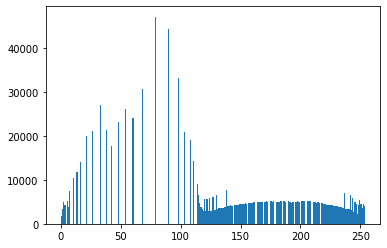

In [10]:
#Aplica el corte de colas
img_exp = ecual(img)

# Dibuja histograma entre 0 y 254
plt.hist(img_exp.ravel(), 255,[0,254], width=1);plt.show()

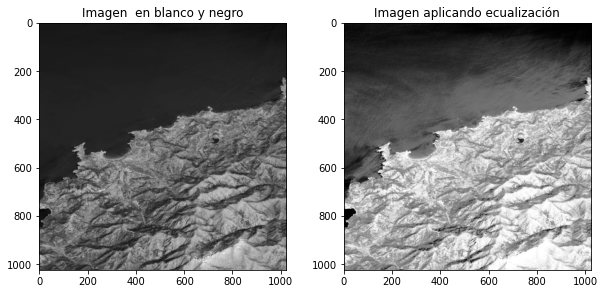

In [11]:
fig = plt.figure(figsize=(10, 10)) # Creamos nueva figura

#Mostramos la imagen como el histograma
fig.add_subplot(221)
plt.title('Imagen  en blanco y negro')
plt.imshow(img,cmap='gray')
fig.add_subplot(222)
plt.title('Imagen aplicando ecualización')
plt.imshow(img_exp,cmap='gray')
plt.show()